In [2]:
# -*-coding:utf-8-*-

"""
代码3-1  数据集介绍之MovieLens数据集
"""
import pandas as pd
import matplotlib.pyplot as plt

# 用来正常显示中文标签
plt.rcParams["font.sans-serif"] = ["SimHei"]  
# 用来正常显示负号
plt.rcParams["axes.unicode_minus"] = False

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


userID的范围为: <1,6040>
movieID的范围为: <1,3952>
评分值的范围为: <1,5>
数据总条数为:
userID       1000209
movieID      1000209
rate         1000209
timestamp    1000209
dtype: int64
数据前5条记录为:
   userID  movieID  rate  timestamp
0       1     1193     5  978300760
1       1      661     3  978302109
2       1      914     3  978301968
3       1     3408     4  978300275
4       1     2355     5  978824291
用户评分记录最少条数为：20
rate
1     56174
2    107557
3    261197
4    348971
5    226310
Name: rate, dtype: int64


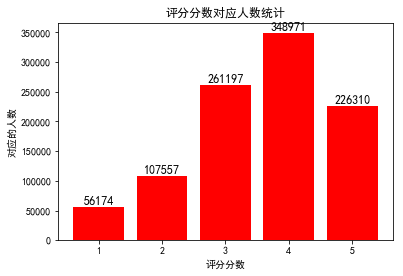

In [5]:
def getRatings(file_path):
    """包含1000209条数据
    格式：UserID::MovieID::Rating::Timestamp
    """
    rates = pd.read_table(
        file_path,
        header=None,
        sep="::",
        names=["userID", "movieID", "rate", "timestamp"],
    )
    print("userID的范围为: <{},{}>"
          .format(min(rates["userID"]), max(rates["userID"])))
    print("movieID的范围为: <{},{}>"
          .format(min(rates["movieID"]), max(rates["movieID"])))
    print("评分值的范围为: <{},{}>"
          .format(min(rates["rate"]), max(rates["rate"])))
    print("数据总条数为:\n{}".format(rates.count()))
    print("数据前5条记录为:\n{}".format(rates.head(5)))
    df = rates["userID"].groupby(rates["userID"])
    print("用户评分记录最少条数为：{}".format(df.count().min()))

    scores = rates["rate"].groupby(rates["rate"]).count()
    print(scores)
    # 图上添加数字
    for x, y in zip(scores.keys(), scores.values):
        plt.text(x, y + 2, "%.0f" % y, ha="center", va="bottom", fontsize=12)
    plt.bar(scores.keys(), scores.values, fc="r", tick_label=scores.keys())
    plt.xlabel("评分分数")
    plt.ylabel("对应的人数")
    plt.title("评分分数对应人数统计")
    plt.show()


getRatings("../data/ml-1m/ratings.dat")

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


movieID的范围为: <1,3952>
数据总条数为:
movieID    3883
title      3883
genres     3883
dtype: int64
电影类型总数为:18
电影类型分别为:dict_keys(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western'])
{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


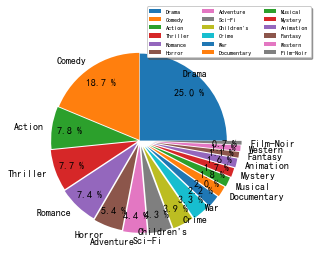

In [6]:
def getMovies(file_path):
    """
    数据格式为：1::Toy Story (1995)::Animation|Children's|Comedy
    电影ID::电影名字::电影类型
    """
    movies = pd.read_table(
        file_path,
        header=None,
        sep="::",
        names=["movieID", "title", "genres"]
    )
    
    print("movieID的范围为: <{},{}>"
          .format(min(movies["movieID"]), max(movies["movieID"])))
    print("数据总条数为:\n{}".format(movies.count()))
    moviesDict = dict()
    for line in movies["genres"].values:
        for one in line.split("|"):
            moviesDict.setdefault(one, 0)
            moviesDict[one] += 1

    print("电影类型总数为:{}".format(len(moviesDict)))
    print("电影类型分别为:{}".format(moviesDict.keys()))
    print(moviesDict)

    newMD = sorted(moviesDict.items(), key=lambda x: x[1], reverse=True)
    # 设置标签
    labels = [newMD[i][0] for i in range(len(newMD))]
    values = [newMD[i][1] for i in range(len(newMD))]
    # 与labels对应，数值越大离中心区越远
    explode = [x * 0.01 for x in range(len(newMD))]
    # 设置X轴 Y轴比例
    plt.axes(aspect=1)
    # labeldistance表示标签离中心距离，pctdistance表示百分百数据离中心区距离
    # autopct表示百分比的格式，shadow表示阴影
    plt.pie(
        x=values,
        labels=labels,
        explode=explode,
        autopct="%3.1f %%",
        shadow=False,
        labeldistance=1.1,
        startangle=0,
        pctdistance=0.8,
        center=(-1, 0),
    )
    # 控制位置：在bbox_to_anchor数组中，前者控制左右移动，后者控制上下
    # ncol控制图例所列的列数，默认为1
    plt.legend(loc=7, bbox_to_anchor=(1.3, 1.0), ncol=3, fancybox=True, shadow=True, fontsize=6)
    plt.show()

getMovies("../data/ml-1m/movies.dat")

userID的范围为: <1,6040>
数据总条数为:
userID        6040
gender        6040
age           6040
Occupation    6040
zip-code      6040
dtype: int64
gender
F    1709
M    4331
Name: gender, dtype: int64


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


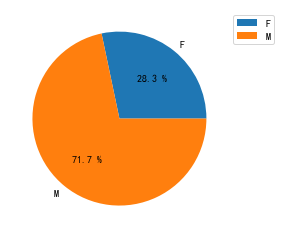

age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
Name: age, dtype: int64


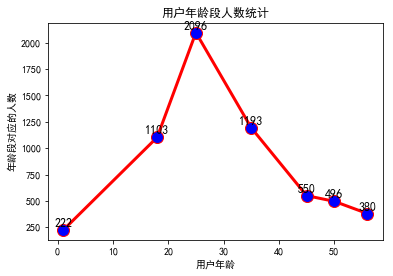

In [7]:
def getUsers(file_path):
    users = pd.read_table(
        file_path,
        header=None,
        sep="::",
        names=["userID", "gender", "age", "Occupation", "zip-code"],
    )
    print("userID的范围为: <{},{}>".format(min(users["userID"]), max(users["userID"])))
    print("数据总条数为:\n{}".format(users.count()))

    usersGender = users["gender"].groupby(users["gender"]).count()
    print(usersGender)

    plt.axes(aspect=1)
    plt.pie(x=usersGender.values, labels=usersGender.keys(), autopct="%3.1f %%")
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.show()

    usersAge = users["age"].groupby(users["age"]).count()
    print(usersAge)

    plt.plot(
        usersAge.keys(),
        usersAge.values,
        label="用户年龄信息展示",
        linewidth=3,
        color="r",
        marker="o",
        markerfacecolor="blue",
        markersize=12,
    )
    # 图上添加数字
    for x, y in zip(usersAge.keys(), usersAge.values):
        plt.text(x, y+10, "%.0f" % y, ha="center", va="bottom", fontsize=12)
    plt.xlabel("用户年龄")
    plt.ylabel("年龄段对应的人数")
    plt.title("用户年龄段人数统计")
    plt.show()

getUsers("../data/ml-1m/users.dat")